# Série temporal original

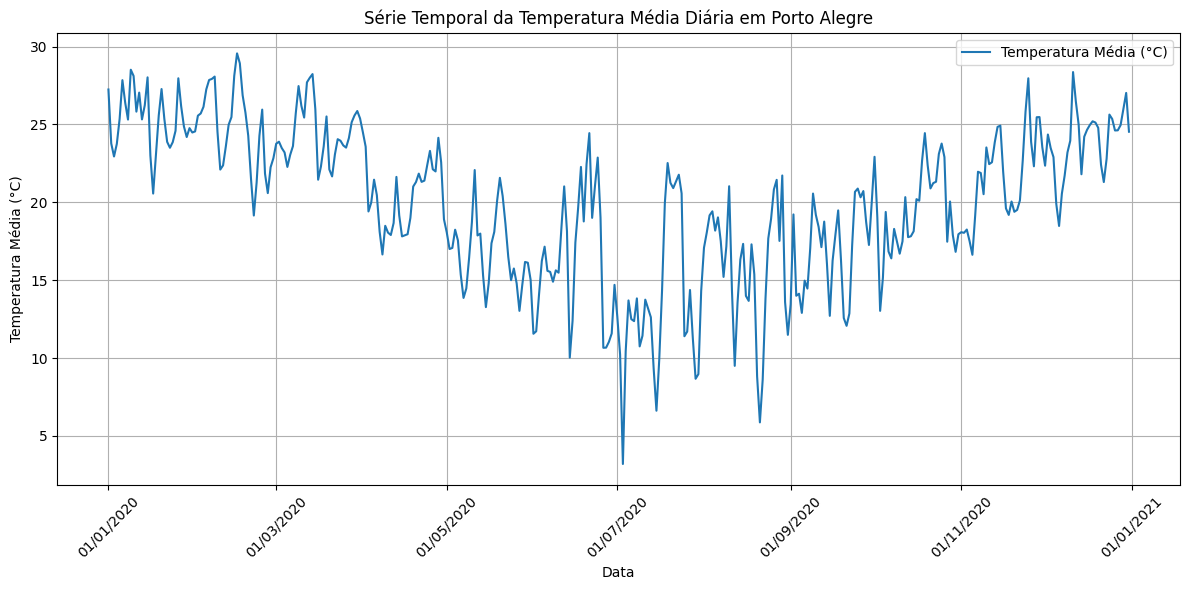

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv('temperatura_poa.csv', sep=';')

# Convert 'Data' column to datetime
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Set 'Data' as the index
df.set_index('Data', inplace=True)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MED'], label='Temperatura Média (°C)')
plt.title('Série Temporal da Temperatura Média Diária em Porto Alegre')
plt.xlabel('Data')
plt.ylabel('Temperatura Média (°C)')

# Format the x-axis date format
date_format = mdates.DateFormatter('%d/%m/%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('temperatura_media_timeseries_formatada.png')

# Teste de estacionaridade ADF  e KPSS da série temporal original

In [2]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Load the dataset
df = pd.read_csv('temperatura_poa.csv', sep=';')

# --- ADF Test ---
adf_test = adfuller(df['MED'], autolag='AIC')
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adf_test[4].items():
    adf_output['Critical Value (%s)'%key] = value
print('Resultados do teste Dickey-Fuller Aumentado:')
print(adf_output)

print("\n--- Interpretação do Teste ADF ---")
if adf_test[1] <= 0.05:
    print("P-valor de", adf_test[1], "é menor ou igual a 0.05. Rejeitamos a hipótese nula (H0).")
    print("A série temporal é considerada ESTACIONÁRIA.")
else:
    print("P-valor de", adf_test[1], "é maior que 0.05. Não podemos rejeitar a hipótese nula (H0).")
    print("A série temporal é considerada NÃO ESTACIONÁRIA.")

# --- KPSS Test ---
kpss_test = kpss(df['MED'], regression='c', nlags="auto")
kpss_output = pd.Series(kpss_test[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpss_test[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print('\nResultados do teste KPSS:')
print(kpss_output)

print("\n--- Interpretação do Teste KPSS ---")
if kpss_test[1] <= 0.05:
    print("P-valor de", kpss_test[1], "é menor ou igual a 0.05. Rejeitamos a hipótese nula (H0).")
    print("A série temporal é considerada NÃO ESTACIONÁRIA.")
else:
    print("P-valor de", kpss_test[1], "é maior que 0.05. Não podemos rejeitar a hipótese nula (H0).")
    print("A série temporal é considerada ESTACIONÁRIA.")

Resultados do teste Dickey-Fuller Aumentado:
Test Statistic                  -1.681140
p-value                          0.440855
#Lags Used                      15.000000
Number of Observations Used    350.000000
Critical Value (1%)             -3.449173
Critical Value (5%)             -2.869833
Critical Value (10%)            -2.571188
dtype: float64

--- Interpretação do Teste ADF ---
P-valor de 0.4408548079839076 é maior que 0.05. Não podemos rejeitar a hipótese nula (H0).
A série temporal é considerada NÃO ESTACIONÁRIA.

Resultados do teste KPSS:
Test Statistic            0.921923
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

--- Interpretação do Teste KPSS ---
P-valor de 0.01 é menor ou igual a 0.05. Rejeitamos a hipótese nula (H0).
A série temporal é considerada NÃO ESTACIONÁRIA.


/tmp/ipython-input-2602038172.py:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df['MED'], regression='c', nlags="auto")


# Diferenciação

Resultados do teste Dickey-Fuller Aumentado na série diferenciada:
Test Statistic                -7.602124e+00
p-value                        2.374052e-11
#Lags Used                     1.400000e+01
Number of Observations Used    3.500000e+02
Critical Value (1%)           -3.449173e+00
Critical Value (5%)           -2.869833e+00
Critical Value (10%)          -2.571188e+00
dtype: float64

--- Interpretação do Teste ADF (Série Diferenciada) ---
P-valor de 2.374051740169921e-11 é menor ou igual a 0.05. Rejeitamos a hipótese nula (H0).
A série temporal diferenciada é considerada ESTACIONÁRIA.

Resultados do teste KPSS na série diferenciada:
Test Statistic            0.257273
p-value                   0.100000
Lags Used                36.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

--- Interpretação do Teste KPSS (Série Diferenciada) ---
P-valor de 0.1 é maior que 0.05. Não 

/tmp/ipython-input-3900676428.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_diff = kpss(df['MED_diff'].dropna(), regression='c', nlags="auto")


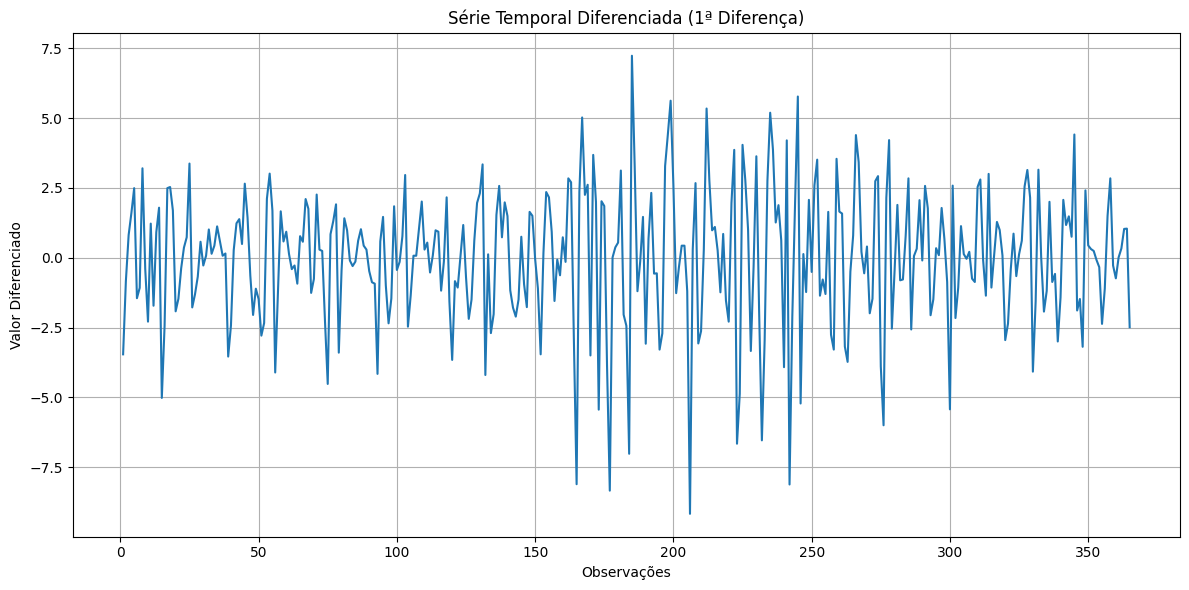

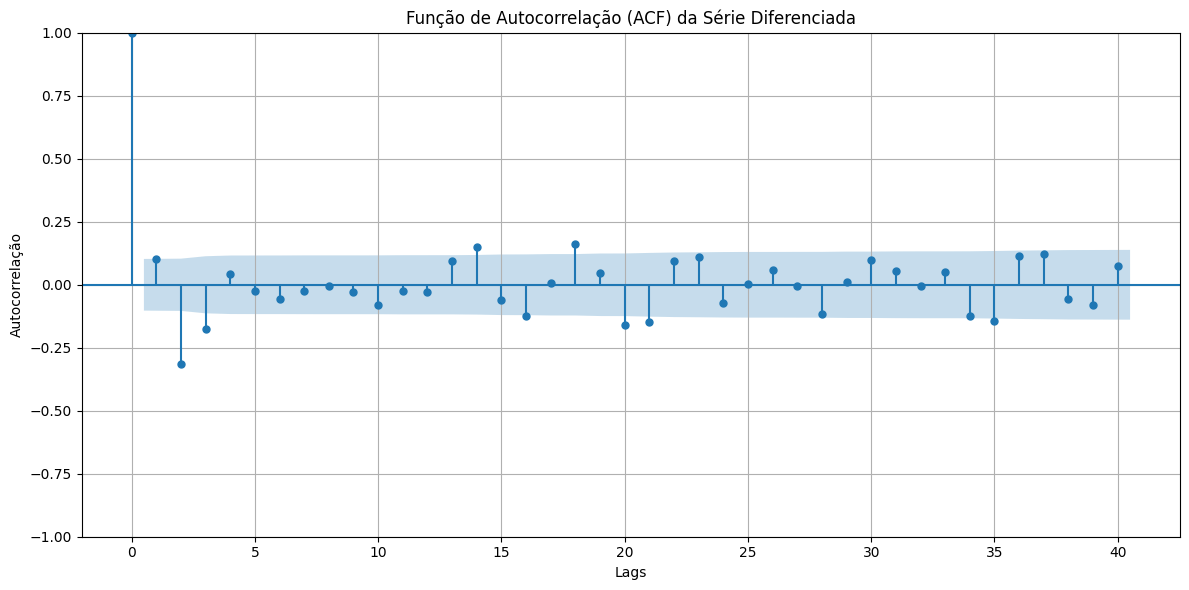

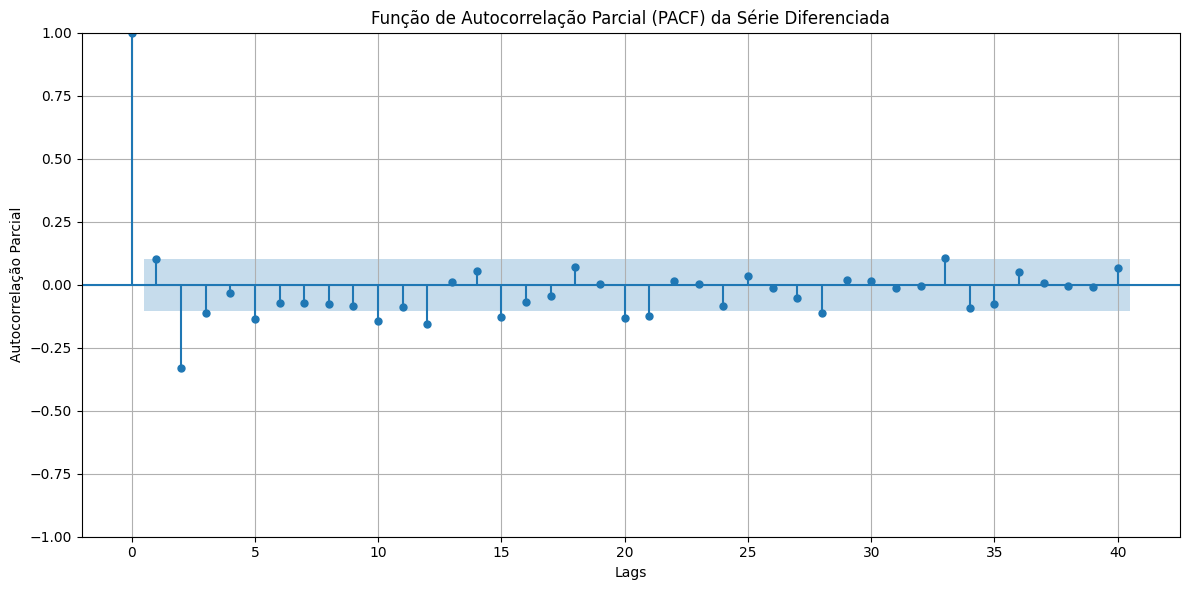

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
df = pd.read_csv('temperatura_poa.csv', sep=';')

# First Differencing
df['MED_diff'] = df['MED'].diff().dropna()

# --- Stationarity Tests on Differenced Data ---

# ADF Test
adf_test_diff = adfuller(df['MED_diff'].dropna(), autolag='AIC')
print('Resultados do teste Dickey-Fuller Aumentado na série diferenciada:')
adf_output_diff = pd.Series(adf_test_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in adf_test_diff[4].items():
    adf_output_diff['Critical Value (%s)'%key] = value
print(adf_output_diff)

print("\n--- Interpretação do Teste ADF (Série Diferenciada) ---")
if adf_test_diff[1] <= 0.05:
    print("P-valor de", adf_test_diff[1], "é menor ou igual a 0.05. Rejeitamos a hipótese nula (H0).")
    print("A série temporal diferenciada é considerada ESTACIONÁRIA.")
else:
    print("P-valor de", adf_test_diff[1], "é maior que 0.05. Não podemos rejeitar a hipótese nula (H0).")
    print("A série temporal diferenciada é considerada NÃO ESTACIONÁRIA.")

# KPSS Test
kpss_test_diff = kpss(df['MED_diff'].dropna(), regression='c', nlags="auto")
print('\nResultados do teste KPSS na série diferenciada:')
kpss_output_diff = pd.Series(kpss_test_diff[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpss_test_diff[3].items():
    kpss_output_diff['Critical Value (%s)'%key] = value
print(kpss_output_diff)

print("\n--- Interpretação do Teste KPSS (Série Diferenciada) ---")
if kpss_test_diff[1] <= 0.05:
    print("P-valor de", kpss_test_diff[1], "é menor ou igual a 0.05. Rejeitamos a hipótese nula (H0).")
    print("A série temporal diferenciada é considerada NÃO ESTACIONÁRIA.")
else:
    print("P-valor de", kpss_test_diff[1], "é maior que 0.05. Não podemos rejeitar a hipótese nula (H0).")
    print("A série temporal diferenciada é considerada ESTACIONÁRIA.")


# --- Plotting ---

# Plot Differenced Series
plt.figure(figsize=(12, 6))
plt.plot(df['MED_diff'])
plt.title('Série Temporal Diferenciada (1ª Diferença)')
plt.xlabel('Observações')
plt.ylabel('Valor Diferenciado')
plt.grid(True)
plt.tight_layout()
plt.savefig('serie_diferenciada.png')
plt.show()

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['MED_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Função de Autocorrelação (ACF) da Série Diferenciada')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.tight_layout()
plt.savefig('acf_plot.png')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['MED_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('Função de Autocorrelação Parcial (PACF) da Série Diferenciada')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação Parcial')
plt.grid(True)
plt.tight_layout()
plt.savefig('pacf_plot.png')
plt.show()

# Ajuste do modelo ARIMA(p,1,q)

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Ignora avisos comuns da biblioteca para uma saída mais limpa
warnings.filterwarnings("ignore")

# Carrega o conjunto de dados a partir do arquivo CSV
# Certifique-se de que o arquivo 'temperatura_poa.csv' está no mesmo diretório
df = pd.read_csv('temperatura_poa.csv', sep=';')
series = df['MED']

# Define a lista de modelos candidatos no formato (p, d, q)
candidate_models = [(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3)]

print("--- Sumário dos Modelos ARIMA Testados ---")
print("=" * 40)

# Itera sobre cada combinação de ordem (p,d,q) na lista de candidatos
for order in candidate_models:
    try:
        print(f"\n\n>>> INICIANDO ANÁLISE PARA O MODELO ARIMA{order} <<<\n")

        # Cria e treina o modelo ARIMA com a ordem atual
        model = ARIMA(series, order=order)
        model_fit = model.fit()

        # Imprime o sumário completo do modelo
        print(model_fit.summary())
        print("-" * 75)

    except Exception as e:
        print(f"\nNão foi possível ajustar o modelo ARIMA{order}. Erro: {e}")

print("\n" + "=" * 40)
print("--- Fim da Avaliação ---")

--- Sumário dos Modelos ARIMA Testados ---


>>> INICIANDO ANÁLISE PARA O MODELO ARIMA(0, 1, 0) <<<

                               SARIMAX Results                                
Dep. Variable:                    MED   No. Observations:                  366
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -836.327
Date:                Thu, 14 Aug 2025   AIC                           1674.654
Time:                        20:09:09   BIC                           1678.554
Sample:                             0   HQIC                          1676.204
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.7244      0.333     17.190      0.000       5.072       6.377
Ljung-Box (L1) (Q):           

In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
import numpy as np

# Ignora avisos comuns da biblioteca para uma saída mais limpa
warnings.filterwarnings("ignore")

# Carrega o conjunto de dados a partir do arquivo CSV
df = pd.read_csv('temperatura_poa.csv', sep=';')
series = df['MED']


# Define a lista de modelos candidatos no formato (p, d, q)
candidate_models = [(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3)]

print("--- Sumário dos Modelos ARIMA Testados ---")
print("=" * 80)

# Itera sobre cada combinação de ordem (p,d,q) na lista de candidatos
for order in candidate_models:
    try:
        print(f"\n\n>>> INICIANDO ANÁLISE PARA O MODELO ARIMA{order} <<<\n")

        # Cria e treina o modelo ARIMA com a ordem atual
        model = ARIMA(series, order=order)
        model_fit = model.fit()

        # --- Início da Formatação do Sumário Personalizado ---

        # Extrai os resultados do modelo
        results_summary = model_fit.summary()
        # A data e hora podem ser extraídas diretamente do summary() ou geradas
        # Para simplicidade, vamos usar placeholders ou extrair se necessário
        # Nota: A extração exata de 'Date' e 'Time' do objeto pode ser complexa.
        # O summary() os gera no momento da chamada.

        # Extrai as tabelas do sumário
        results_tables = results_summary.tables
        top_left_table = results_tables[0]
        top_right_table = results_tables[0] # Em versões mais recentes, pode ser uma única tabela
        coefficients_table = results_tables[1]

        # Define as larguras das colunas para um alinhamento perfeito
        col1_width = 18
        col2_width = 22
        col3_width = 22
        col4_width = 15

        print(" " * 28 + "ARIMA Model Results")
        print("="*80)

        # Usa f-strings com larguras definidas para garantir o alinhamento
        print(f"{'Dep. Variable:':<{col1_width}}{'D.value':<{col2_width}}{'No. Observations:':<{col3_width}}{str(model_fit.nobs):>{col4_width}}")
        print(f"{'Model:':<{col1_width}}{f'ARIMA{order}':<{col2_width}}{'Log Likelihood':<{col3_width}}{f'{model_fit.llf:.3f}':>{col4_width}}")
        print(f"{'Method:':<{col1_width}}{'css-mle':<{col2_width}}{'S.D. of innovations':<{col3_width}}{f'{np.sqrt(model_fit.sse / model_fit.nobs):.3f}':>{col4_width}}")
        print(f"{'Date:':<{col1_width}}{pd.Timestamp.now().strftime('%a, %d %b %Y'):<{col2_width}}{'AIC':<{col3_width}}{f'{model_fit.aic:.3f}':>{col4_width}}")
        print(f"{'Time:':<{col1_width}}{pd.Timestamp.now().strftime('%H:%M:%S'):<{col2_width}}{'BIC':<{col3_width}}{f'{model_fit.bic:.3f}':>{col4_width}}")
        print(f"{'Sample:':<{col1_width}}{'1':<{col2_width}}{'HQIC':<{col3_width}}{f'{model_fit.hqic:.3f}':>{col4_width}}")

        print("="*80)
        print(model_fit.summary().tables[1]) # A tabela de coeficientes já é bem formatada
        print("-" * 80)

        # --- Fim da Formatação do Sumário Personalizado ---

    except Exception as e:
        print(f"\nNão foi possível ajustar o modelo ARIMA{order}. Erro: {e}")

print("\n" + "=" * 80)
print("--- Fim da Avaliação ---")

--- Sumário dos Modelos ARIMA Testados ---


>>> INICIANDO ANÁLISE PARA O MODELO ARIMA(0, 1, 0) <<<

                            ARIMA Model Results
Dep. Variable:    D.value               No. Observations:                 366
Model:            ARIMA(0, 1, 0)        Log Likelihood               -836.327
Method:           css-mle               S.D. of innovations             2.781
Date:             Thu, 14 Aug 2025      AIC                          1674.654
Time:             20:09:23              BIC                          1678.554
Sample:           1                     HQIC                         1676.204
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.7244      0.333     17.190      0.000       5.072       6.377
--------------------------------------------------------------------------------


>>> INICIANDO ANÁLISE PARA O MODELO ARIMA(0, 1, 1) <<<

       

# Melhor modelo ARIMA(1,1,2)

Figura 'diagnostico_completo_com_kde_normal.png' salva com sucesso.
--- Teste de Ljung-Box para os Resíduos (40 Lags) ---
      lb_stat  lb_pvalue
1    0.332968   0.563916
2    0.440514   0.802313
3    1.078322   0.782310
4    3.641795   0.456648
5    3.647668   0.601171
6    4.186190   0.651496
7    4.351853   0.738475
8    4.445632   0.814848
9    4.660918   0.862809
10   6.829199   0.741465
11   6.987695   0.800079
12   7.948958   0.789106
13   9.026946   0.770905
14  12.871688   0.536651
15  15.797264   0.395652
16  17.042952   0.382823
17  17.071169   0.449555
18  20.528053   0.303888
19  20.924497   0.340988
20  23.631812   0.258845
21  26.254102   0.196925
22  27.035761   0.209871
23  28.593560   0.194165
24  29.343599   0.207467
25  30.874881   0.193195
26  30.902200   0.231932
27  31.182117   0.263727
28  32.755503   0.244864
29  33.471254   0.259141
30  34.373790   0.266137
31  35.455620   0.266100
32  35.455621   0.308520
33  36.977927   0.290255
34  37.619454   0.306950
35 

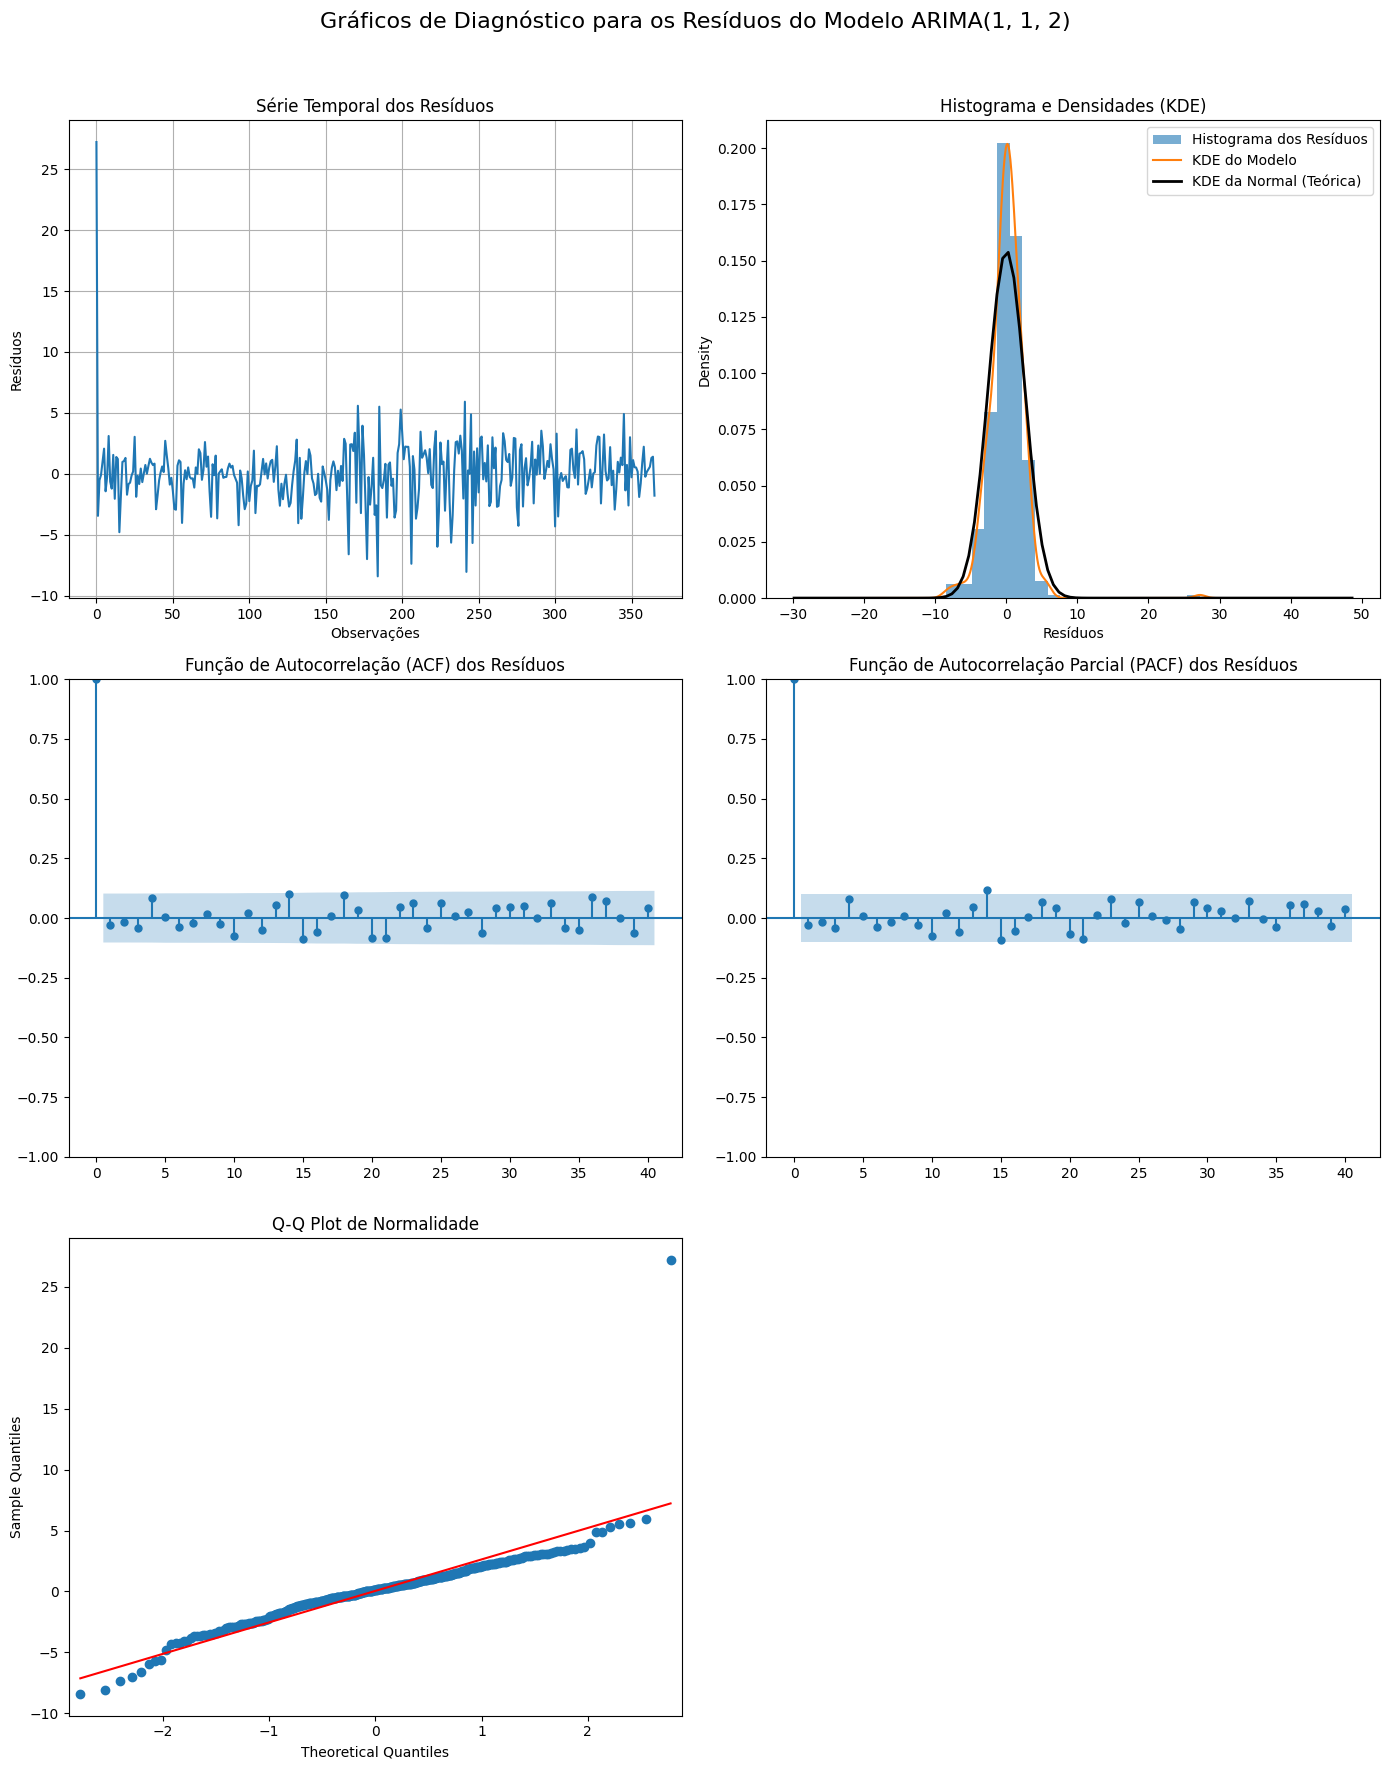

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm # Importa a função de distribuição normal
import warnings

# Ignora avisos comuns para uma saída mais limpa
warnings.filterwarnings("ignore")

# --- 1. Carregar os Dados e Ajustar o Melhor Modelo ---
df = pd.read_csv('temperatura_poa.csv', sep=';')
series = df['MED']

# Ajusta o melhor modelo encontrado, ARIMA(1, 1, 2)
order = (1, 1, 2)
model = ARIMA(series, order=order)
model_fit = model.fit()
residuals = model_fit.resid # Extrai os resíduos do modelo

# --- 2. Criar uma Figura Única com Todos os Gráficos de Diagnóstico ---
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Gráficos de Diagnóstico para os Resíduos do Modelo ARIMA(1, 1, 2)', fontsize=16)

# Gráfico 1: Série Temporal dos Resíduos
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Série Temporal dos Resíduos')
axes[0, 0].set_xlabel('Observações')
axes[0, 0].set_ylabel('Resíduos')
axes[0, 0].grid(True)

# Gráfico 2: Histograma com KDE do Modelo e da Normal Teórica
# Plota o histograma dos resíduos
axes[0, 1].hist(residuals, bins=20, density=True, alpha=0.6, label='Histograma dos Resíduos')

# Plota a KDE dos resíduos (a distribuição real do modelo)
residuals.plot(kind='kde', ax=axes[0, 1], label='KDE do Modelo')

# Calcula e plota a distribuição normal teórica para comparação
mu, std = norm.fit(residuals)
xmin, xmax = axes[0, 1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[0, 1].plot(x, p, 'k', linewidth=2, label='KDE da Normal (Teórica)')
axes[0, 1].set_title('Histograma e Densidades (KDE)')
axes[0, 1].set_xlabel('Resíduos')
axes[0, 1].legend()

# Gráfico 3: ACF dos Resíduos
plot_acf(residuals, ax=axes[1, 0], lags=40)
axes[1, 0].set_title('Função de Autocorrelação (ACF) dos Resíduos')

# Gráfico 4: PACF dos Resíduos
plot_pacf(residuals, ax=axes[1, 1], lags=40)
axes[1, 1].set_title('Função de Autocorrelação Parcial (PACF) dos Resíduos')

# Gráfico 5: Q-Q Plot de Normalidade
sm.qqplot(residuals, line='s', ax=axes[2, 0])
axes[2, 0].set_title('Q-Q Plot de Normalidade')

# Esconde o último subplot que não será usado
axes[2, 1].axis('off')


# Ajusta o layout para evitar sobreposição e salva a figura
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('diagnostico_completo_com_kde_normal.png')

print("Figura 'diagnostico_completo_com_kde_normal.png' salva com sucesso.")


# Carrega o conjunto de dados
df = pd.read_csv('temperatura_poa.csv', sep=';')
series = df['MED']

# Ajusta o melhor modelo, ARIMA(1, 1, 2)
order = (1, 1, 2)
model = ARIMA(series, order=order)
model_fit = model.fit()
residuals = model_fit.resid

# Realiza o teste de Ljung-Box para 40 lags
ljung_box_results = acorr_ljungbox(residuals, lags=40, return_df=True)

print("--- Teste de Ljung-Box para os Resíduos (40 Lags) ---")
print(ljung_box_results)

# Geração de dados sintéticos apartir do melhor modelo ARIMA(1,1,2)
# Simulação e Comparação de Séries Temporais com Modelo ARIMA: Dados Originais, Ajustados e Sintéticos

Carregando os dados reais do arquivo 'temperatura_poa.csv'...
Dados carregados e processados com sucesso.
Ajustando o modelo ARIMA(1,1,2) final...
Modelo final ajustado com sucesso.
                               SARIMAX Results                                
Dep. Variable:                    MED   No. Observations:                  366
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -799.066
Date:                Thu, 14 Aug 2025   AIC                           1606.132
Time:                        20:09:33   BIC                           1621.732
Sample:                    01-01-2020   HQIC                          1612.332
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5103      0

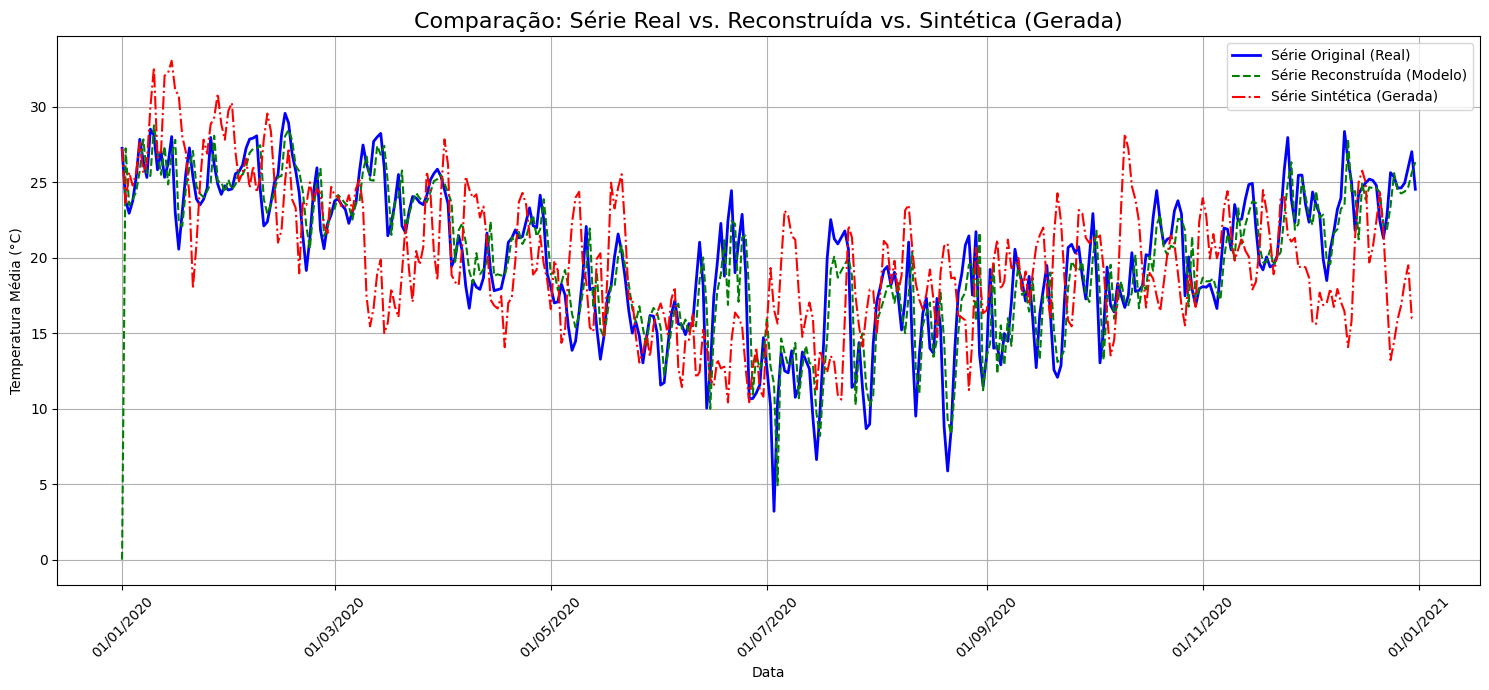

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Fixar a semente para garantir reprodutibilidade
np.random.seed(283)

# --- 1. Carregar os Dados Reais ---
print("Carregando os dados reais do arquivo 'temperatura_poa.csv'...")
try:
    df = pd.read_csv('temperatura_poa.csv', sep=';', decimal=',', parse_dates=['Data'], dayfirst=True)
    df['MED'] = pd.to_numeric(df['MED'], errors='coerce')
    df.dropna(subset=['MED'], inplace=True)
    series = df.set_index('Data')['MED']
    print("Dados carregados e processados com sucesso.")
except Exception as e:
    print("ERRO ao carregar o arquivo:", e)
    exit()

# --- 2. Ajustar o Modelo ARIMA Final e Robusto ---
print("Ajustando o modelo ARIMA(1,1,2) final...")
order = (1, 1, 2)
model = ARIMA(series, order=order, trend='n')
model_fit = model.fit()
print("Modelo final ajustado com sucesso.")
print(model_fit.summary())

# --- 3. Reconstruir a Série ---
reconstructed_series = model_fit.predict(typ='in-sample')
if pd.isna(reconstructed_series.iloc[0]):
    reconstructed_series.iloc[0] = series.iloc[0]

# --- 4. Gerar Série Sintética (SEM ALINHAMENTO) ---
print("Gerando série sintética (Gerada)...")

params = model_fit.params
ar_coeffs = [params.get(f'ar.L{i+1}', 0) for i in range(order[0])]
ma_coeffs = [params.get(f'ma.L{i+1}', 0) for i in range(order[2])]
sigma2 = params.get('sigma2', 1)
sigma = np.sqrt(sigma2)

ar_params = np.r_[1, -np.array(ar_coeffs)]
ma_params = np.r_[1, np.array(ma_coeffs)]
arma_process = ArmaProcess(ar_params, ma_params)
synthetic_diff = arma_process.generate_sample(nsample=len(series)-1, scale=sigma)
start_value = series.iloc[0]
synthetic_series_np = np.concatenate(([start_value], start_value + np.cumsum(synthetic_diff)))
synthetic_series = pd.Series(synthetic_series_np, index=series.index)
print("Série sintética gerada.")

# --- 5. Plotar Séries ---
print("Gerando gráfico de comparação final...")
plt.figure(figsize=(15, 7))
plt.plot(series, label='Série Original (Real)', color='blue', linewidth=2)
plt.plot(reconstructed_series, label='Série Reconstruída (Modelo)', color='green', linestyle='--')
# ALTERAÇÃO: Plotando a série sintética SEM alinhamento
plt.plot(synthetic_series, label='Série Sintética (Gerada)', color='red', linestyle='-.')

plt.title('Comparação: Série Real vs. Reconstruída vs. Sintética (Gerada)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Temperatura Média (°C)')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparacao_series.png')

# --- 6. Estatísticas ---
print("\n--- Estatísticas Descritivas Finais ---")

print(f"\nSérie Original (Real):\n  - Média: {series.mean():.2f} °C\n  - Desvio Padrão: {series.std():.2f} °C")
print(f"\nSérie Reconstruída:\n  - Média: {reconstructed_series.mean():.2f} °C\n  - Desvio Padrão: {reconstructed_series.std():.2f} °C")
# ALTERAÇÃO: Calculando estatísticas para a série sintética SEM alinhamento
print(f"\nSérie Sintética (Gerada):\n  - Média: {synthetic_series.mean():.2f} °C\n  - Desvio Padrão: {synthetic_series.std():.2f} °C")

print("\nGráfico salvo como 'comparacao_series.png'.")

# Testes de estacionaridade ADF e KPSS nas 3 séries (original, reconstruida a partir do ARIMA(1,1,2) e sintética reconstruida)

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# --- NOVOS IMPORTS PARA OS TESTES ---
from statsmodels.tsa.stattools import adfuller, kpss

# Fixar a semente para garantir reprodutibilidade
np.random.seed(283) # Usei a semente do seu código original para consistência

# --- FUNÇÃO AUXILIAR PARA OS TESTES DE ESTACIONARIEDADE ---
def perform_stationarity_tests(timeseries, series_name="Série"):
    """Realiza e imprime os resultados dos testes ADF e KPSS para uma série temporal."""
    print(f"\n--- Testes de Estacionariedade para a Série: {series_name} ---")

    # Teste ADF
    print("\n--- Teste ADF ---")
    print("H0: A série é não-estacionária.")
    adf_test = adfuller(timeseries, autolag='AIC')
    p_value_adf = adf_test[1]
    print(f"Estatística ADF: {adf_test[0]:.4f}")
    print(f"P-valor: {p_value_adf:.4f}")
    if p_value_adf <= 0.05:
        print("Conclusão (p <= 0.05): Rejeita-se H0. A série é ESTACIONÁRIA.")
    else:
        print("Conclusão (p > 0.05): Não se rejeita H0. A série é NÃO-ESTACIONÁRIA.")

    # Teste KPSS
    print("\n--- Teste KPSS ---")
    print("H0: A série é estacionária.")
    with np.errstate(invalid='ignore'): # Ignora avisos comuns do teste KPSS
        kpss_test = kpss(timeseries, regression='c', nlags="auto")
    p_value_kpss = kpss_test[1]
    print(f"Estatística KPSS: {kpss_test[0]:.4f}")
    print(f"P-valor: {p_value_kpss:.4f}")
    if p_value_kpss <= 0.05:
        print("Conclusão (p <= 0.05): Rejeita-se H0. A série é NÃO-ESTACIONÁRIA.")
    else:
        print("Conclusão (p > 0.05): Não se rejeita H0. A série é ESTACIONÁRIA.")
    print("-" * 50)


# Fixar a semente para garantir reprodutibilidade
np.random.seed(900)

# --- 1. Carregar os Dados Reais ---
print("Carregando os dados reais do arquivo 'temperatura_poa.csv'...")
try:
    df = pd.read_csv('temperatura_poa.csv', sep=';', decimal=',', parse_dates=['Data'], dayfirst=True)
    df['MED'] = pd.to_numeric(df['MED'], errors='coerce')
    df.dropna(subset=['MED'], inplace=True)
    series = df.set_index('Data')['MED']
    print("Dados carregados e processados com sucesso.")
except Exception as e:
    print("ERRO ao carregar o arquivo:", e)
    exit()

# --- 2. Ajustar o Modelo ARIMA Final e Robusto ---
print("\nAjustando o modelo ARIMA(1,1,2) final...")
order = (1, 1, 2)
model = ARIMA(series, order=order, trend='n')
model_fit = model.fit()
print("Modelo final ajustado com sucesso.")

# --- 3. Reconstruir a Série ---
reconstructed_series = model_fit.predict(typ='in-sample')
if pd.isna(reconstructed_series.iloc[0]):
    reconstructed_series.iloc[0] = series.iloc[0]

# --- 4. Gerar Série Sintética (SEM ALINHAMENTO) ---
print("\nGerando série sintética (Gerada)...")
params = model_fit.params
ar_coeffs = [params.get(f'ar.L{i+1}', 0) for i in range(order[0])]
ma_coeffs = [params.get(f'ma.L{i+1}', 0) for i in range(order[2])]
sigma2 = params.get('sigma2', 1)
sigma = np.sqrt(sigma2)
ar_params = np.r_[1, -np.array(ar_coeffs)]
ma_params = np.r_[1, np.array(ma_coeffs)]
arma_process = ArmaProcess(ar_params, ma_params)
synthetic_diff = arma_process.generate_sample(nsample=len(series)-1, scale=sigma)
start_value = series.iloc[0]
synthetic_series_np = np.concatenate(([start_value], start_value + np.cumsum(synthetic_diff)))
synthetic_series = pd.Series(synthetic_series_np, index=series.index)
print("Série sintética gerada.")

# --- Opcional: Plotar Séries e Estatísticas ---
# (O código de plotagem e estatísticas pode ser mantido ou comentado)
# plt.figure... etc.
# print(f"Média...") etc.

# --- 7. TESTES DE ESTACIONARIEDADE ---
# Executa os testes nas três séries geradas
perform_stationarity_tests(series, "Original (Real)")
perform_stationarity_tests(reconstructed_series, "Reconstruída")
perform_stationarity_tests(synthetic_series, "Sintética (Gerada)")

Carregando os dados reais do arquivo 'temperatura_poa.csv'...
Dados carregados e processados com sucesso.

Ajustando o modelo ARIMA(1,1,2) final...
Modelo final ajustado com sucesso.

Gerando série sintética (Gerada)...
Série sintética gerada.

--- Testes de Estacionariedade para a Série: Original (Real) ---

--- Teste ADF ---
H0: A série é não-estacionária.
Estatística ADF: -1.6811
P-valor: 0.4409
Conclusão (p > 0.05): Não se rejeita H0. A série é NÃO-ESTACIONÁRIA.

--- Teste KPSS ---
H0: A série é estacionária.
Estatística KPSS: 0.9219
P-valor: 0.0100
Conclusão (p <= 0.05): Rejeita-se H0. A série é NÃO-ESTACIONÁRIA.
--------------------------------------------------

--- Testes de Estacionariedade para a Série: Reconstruída ---

--- Teste ADF ---
H0: A série é não-estacionária.
Estatística ADF: -1.6874
P-valor: 0.4376
Conclusão (p > 0.05): Não se rejeita H0. A série é NÃO-ESTACIONÁRIA.

--- Teste KPSS ---
H0: A série é estacionária.
Estatística KPSS: 1.0033
P-valor: 0.0100
Conclusão 

# QQ Plot e testes de hipotése KS e Ljung box nas 3 series

Carregando os dados reais...
Dados carregados com sucesso.

Ajustando o modelo ARIMA(1,1,2) final...
Modelo final ajustado com sucesso.

Gerando séries reconstruída e sintética (Gerada)...
Séries prontas para o teste.

--- Teste de Kolmogorov-Smirnov (KS) ---
H0: As duas amostras vêm da mesma distribuição.

Original vs. Reconstruída: Estatística KS = 0.0383, p-valor = 0.9521
-> Conclusão: Não há evidências para rejeitar que as séries tenham a mesma distribuição.

Original vs. Sintética: Estatística KS = 0.0984, p-valor = 0.0579
-> Conclusão: Não há evidências para rejeitar que as séries tenham a mesma distribuição.

--- Teste de Ljung-Box (para 40 lags) ---
H0: Os dados são independentes (sem dependência temporal).

Resultados para a Série Original:
        lb_stat  lb_pvalue
40  4144.577494        0.0

Resultados para a Série Reconstruída:
      lb_stat  lb_pvalue
40  4744.1901        0.0

Resultados para a Série Sintética:
        lb_stat  lb_pvalue
40  2643.914656        0.0

-> Com

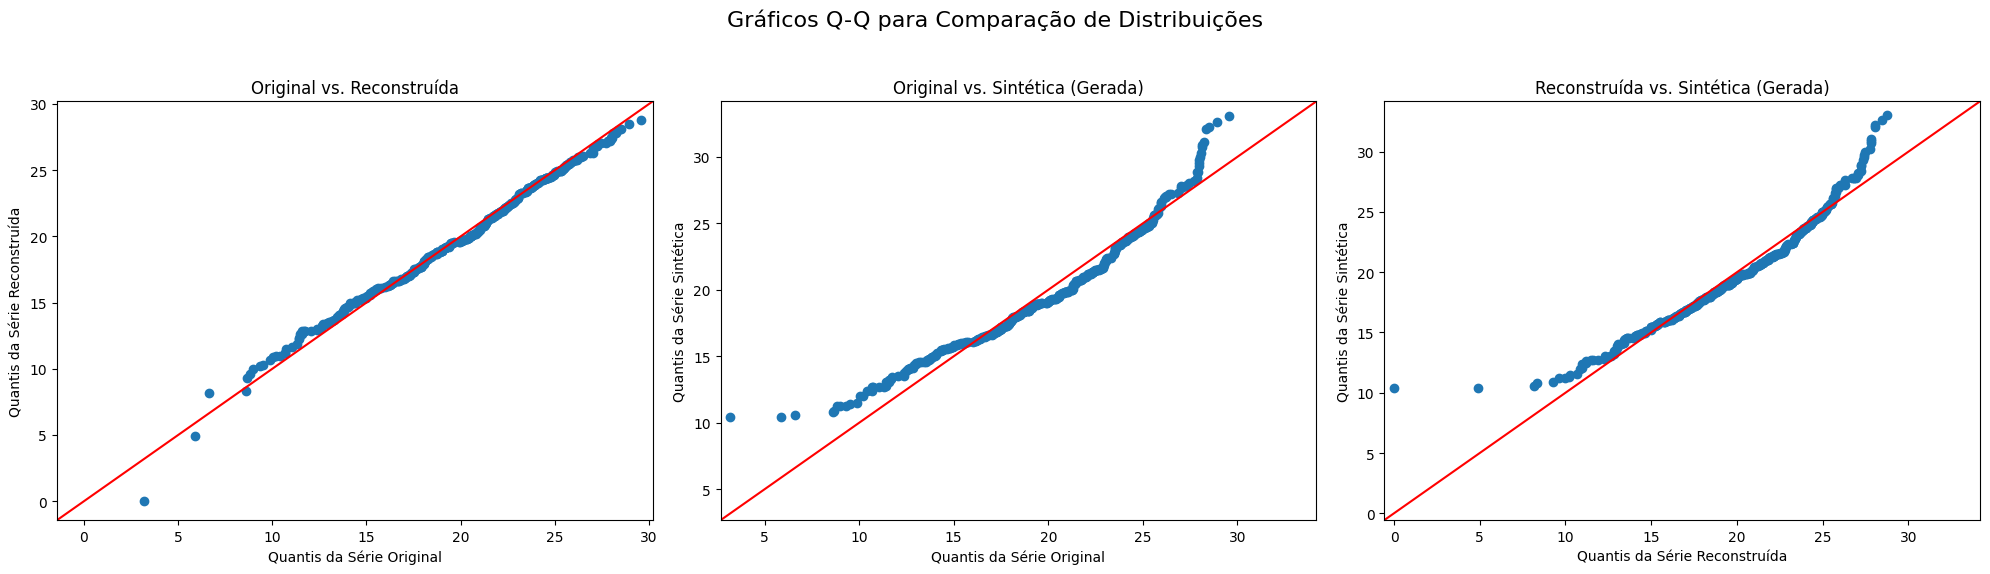

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# --- NOVOS IMPORTS ---
from scipy.stats import kstest
from statsmodels.stats.diagnostic import acorr_ljungbox

# Fixar a semente para garantir reprodutibilidade
np.random.seed(283) # Usei a semente do seu código original para consistência

# --- 1. Carregar os Dados Reais ---
print("Carregando os dados reais...")
try:
    df = pd.read_csv('temperatura_poa.csv', sep=';', decimal=',', parse_dates=['Data'], dayfirst=True)
    df['MED'] = pd.to_numeric(df['MED'], errors='coerce')
    df.dropna(subset=['MED'], inplace=True)
    series = df.set_index('Data')['MED']
    print("Dados carregados com sucesso.")
except Exception as e:
    print("ERRO ao carregar o arquivo:", e)
    exit()

# --- 2. Ajustar o Modelo ARIMA Final ---
print("\nAjustando o modelo ARIMA(1,1,2) final...")
order = (1, 1, 2)
model = ARIMA(series, order=order, trend='n')
model_fit = model.fit()
print("Modelo final ajustado com sucesso.")

# --- 3. Gerar Séries Reconstruída e Sintética ---
print("\nGerando séries reconstruída e sintética (Gerada)...")
# Série Reconstruída
reconstructed_series = model_fit.predict(typ='in-sample')
if pd.isna(reconstructed_series.iloc[0]):
    reconstructed_series.iloc[0] = series.iloc[0]

# Série Sintética (Sem Alinhamento)
params = model_fit.params
ar_coeffs = [params.get(f'ar.L{i+1}', 0) for i in range(order[0])]
ma_coeffs = [params.get(f'ma.L{i+1}', 0) for i in range(order[2])]
sigma2 = params.get('sigma2', 1)
sigma = np.sqrt(sigma2)
ar_params = np.r_[1, -np.array(ar_coeffs)]
ma_params = np.r_[1, np.array(ma_coeffs)]
arma_process = ArmaProcess(ar_params, ma_params)
synthetic_diff = arma_process.generate_sample(nsample=len(series)-1, scale=sigma)
start_value = series.iloc[0]
synthetic_series_np = np.concatenate(([start_value], start_value + np.cumsum(synthetic_diff)))
synthetic_series = pd.Series(synthetic_series_np, index=series.index)
print("Séries prontas para o teste.")

# --- 4. Teste de Kolmogorov-Smirnov (KS) para Similaridade de Distribuição ---
print("\n--- Teste de Kolmogorov-Smirnov (KS) ---")
print("H0: As duas amostras vêm da mesma distribuição.")

# Original vs. Reconstruída
ks_stat_rec, p_value_rec = kstest(series, reconstructed_series)
print(f"\nOriginal vs. Reconstruída: Estatística KS = {ks_stat_rec:.4f}, p-valor = {p_value_rec:.4f}")
if p_value_rec < 0.05:
    print("-> Conclusão: As distribuições são estatisticamente DIFERENTES.")
else:
    print("-> Conclusão: Não há evidências para rejeitar que as séries tenham a mesma distribuição.")

# Original vs. Sintética (Sem Alinhamento)
ks_stat_syn, p_value_syn = kstest(series, synthetic_series)
print(f"\nOriginal vs. Sintética: Estatística KS = {ks_stat_syn:.4f}, p-valor = {p_value_syn:.4f}")
if p_value_syn < 0.05:
    print("-> Conclusão: As distribuições são estatisticamente DIFERENTES.")
else:
    print("-> Conclusão: Não há evidências para rejeitar que as séries tenham a mesma distribuição.")


# --- 5. Teste de Ljung-Box para Autocorrelação ---
print("\n--- Teste de Ljung-Box (para 40 lags) ---")
print("H0: Os dados são independentes (sem dependência temporal).")

lb_original = acorr_ljungbox(series, lags=[40], return_df=True)
print("\nResultados para a Série Original:")
print(lb_original)

lb_reconstructed = acorr_ljungbox(reconstructed_series, lags=[40], return_df=True)
print("\nResultados para a Série Reconstruída:")
print(lb_reconstructed)

lb_synthetic = acorr_ljungbox(synthetic_series, lags=[40], return_df=True)
print("\nResultados para a Série Sintética:")
print(lb_synthetic)
print("\n-> Comparação: Um p-valor baixo (< 0.05) em todos os testes é um SUCESSO, pois confirma que a dependência temporal foi mantida.")

# --- 6. Gráficos Q-Q para Comparação Visual das Distribuições ---
print("\nGerando gráficos Q-Q...")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Gráficos Q-Q para Comparação de Distribuições', fontsize=16)

sm.qqplot_2samples(series, reconstructed_series, xlabel="Quantis da Série Original", ylabel="Quantis da Série Reconstruída", line='45', ax=axes[0])
axes[0].set_title('Original vs. Reconstruída')

sm.qqplot_2samples(series, synthetic_series, xlabel="Quantis da Série Original", ylabel="Quantis da Série Sintética", line='45', ax=axes[1])
axes[1].set_title('Original vs. Sintética (Gerada)')

sm.qqplot_2samples(reconstructed_series, synthetic_series, xlabel="Quantis da Série Reconstruída", ylabel="Quantis da Série Sintética", line='45', ax=axes[2])
axes[2].set_title('Reconstruída vs. Sintética (Gerada)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparacao_testesqq.png')
print("\nFigura 'comparacao_testesqq.png' salva com sucesso.")